In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import eda

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


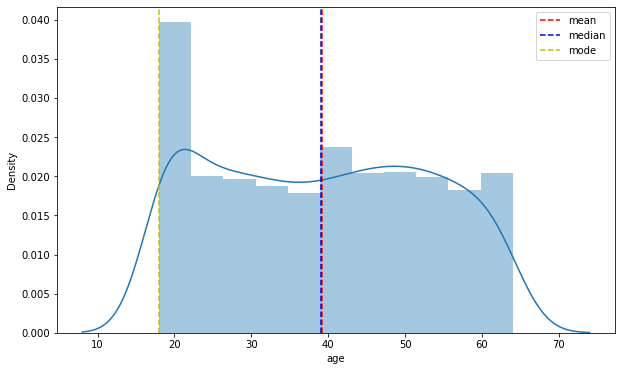

In [4]:
eda.plot_graph(df, 'age')

<AxesSubplot:xlabel='bmi', ylabel='Density'>

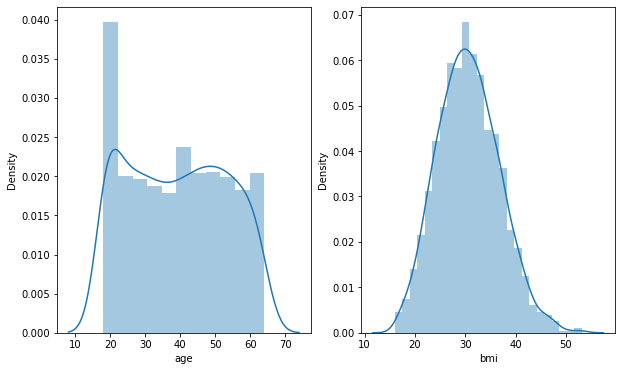

In [5]:
# Execution of subplots
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,2,1)
sns.distplot(df['age'])
ax = fig.add_subplot(1,2,2)
sns.distplot(df['bmi'])


<AxesSubplot:xlabel='charges', ylabel='Density'>

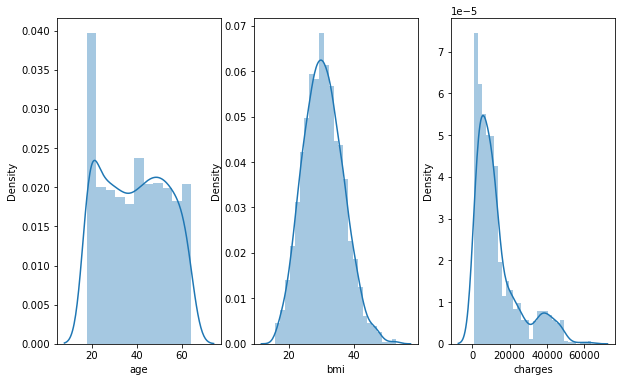

In [6]:
# Execution of subplots
# The 1st digit in bracket is for defining rows
# The 2nd digit in bracket is for defining columns
# The 3rd digit in bracket is for defining the index of that plot
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,3,1)
sns.distplot(df['age'])
ax = fig.add_subplot(1,3,2)
sns.distplot(df['bmi'])
ax = fig.add_subplot(1,3,3)
sns.distplot(df['charges'])


<AxesSubplot:xlabel='children', ylabel='Density'>

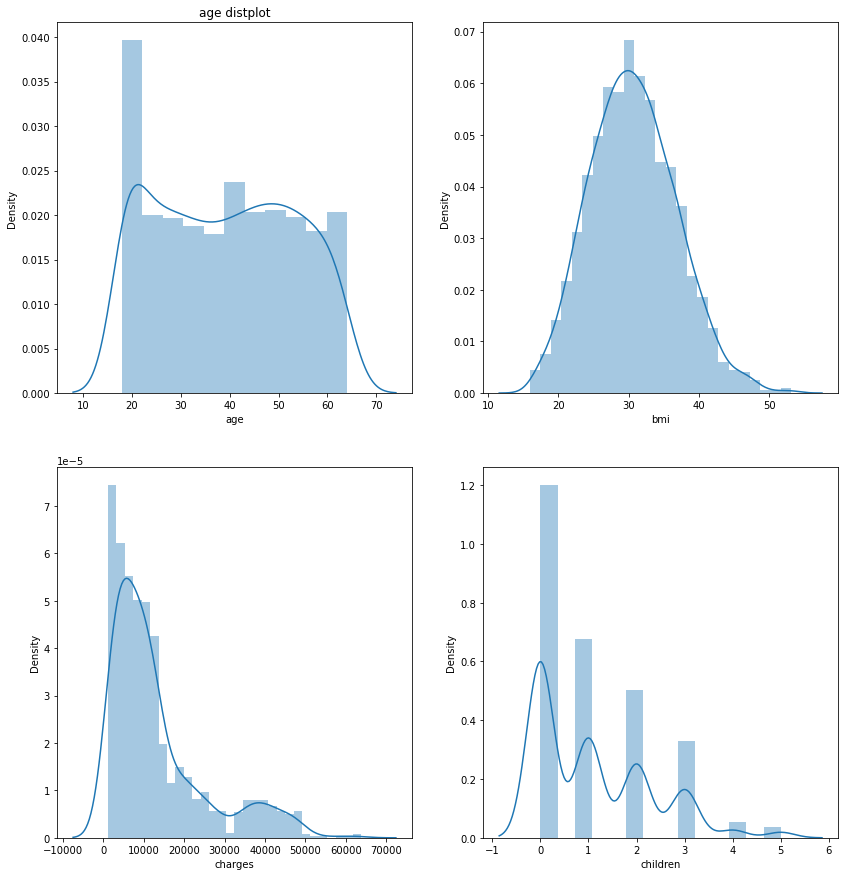

In [7]:
fig = plt.figure(figsize = (14,15))
ax = fig.add_subplot(2,2,1)
sns.distplot(df['age']).set_title('age distplot')

ax = fig.add_subplot(2,2,2)
sns.distplot(df['bmi'])

ax = fig.add_subplot(2,2,3)
sns.distplot(df['charges'])

ax = fig.add_subplot(2,2,4)
sns.distplot(df['children'])

<AxesSubplot:xlabel='children', ylabel='count'>

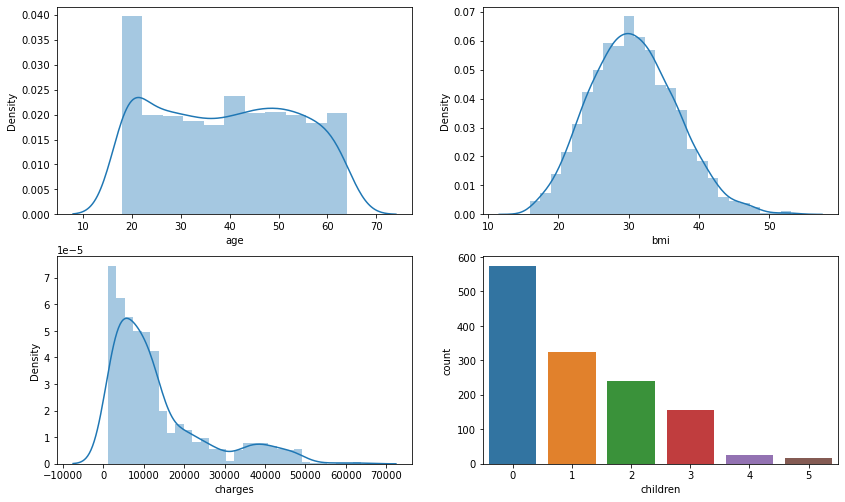

In [8]:
# 3 rows, 2 cols, 4 index
fig = plt.figure(figsize=(14,13))
ax = fig.add_subplot(3,2,1)
sns.distplot(df['age'])

ax = fig.add_subplot(3,2,2)
sns.distplot(df['bmi'])

ax = fig.add_subplot(3,2,3)
sns.distplot(df['charges'])

ax = fig.add_subplot(3,2,4)
sns.countplot(df['children'])



<AxesSubplot:xlabel='children', ylabel='count'>

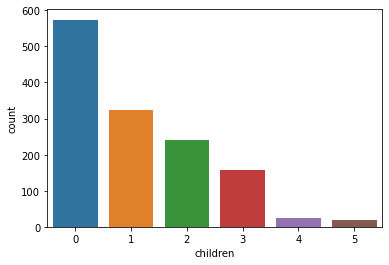

In [9]:
sns.countplot(df['children'])

<AxesSubplot:xlabel='sex', ylabel='count'>

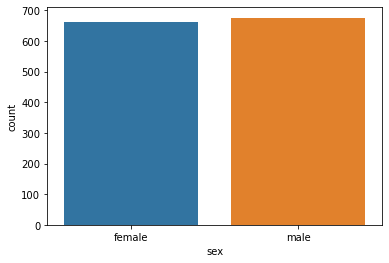

In [10]:
sns.countplot(df['sex'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

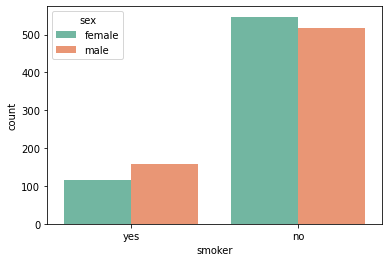

In [11]:
sns.countplot(df['smoker'], hue = df['sex'], palette = 'Set2')

# Boxplots - is for outlier detection

1. Boxplot/Whiskerplot
2. Scatterplot
3. Z-score/ Standard deviation method(Datapoints which are beyond + - 3 standard deviation are treated as outliers.
4. IQR method(Inter quartile range)

<AxesSubplot:xlabel='bmi'>

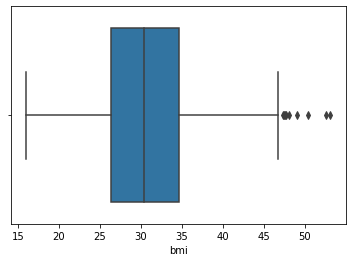

In [12]:
sns.boxplot(df['bmi'])

In [13]:
q3 = df['bmi'].quantile(.75)

In [14]:
q1 = df['bmi'].quantile(.25)

In [15]:
iqr = q3-q1

In [16]:
iqr

8.3975

In [17]:
#upper whisker
uw = q3 + (1.5*iqr)

In [18]:
uw

47.290000000000006

In [19]:
#lower whisker
lw = q1 - (1.5*iqr)

In [20]:
lw

13.7

<AxesSubplot:xlabel='age'>

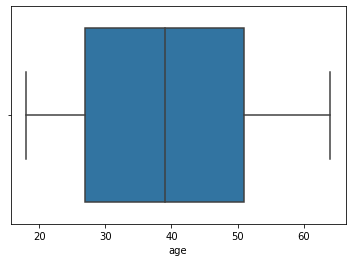

In [21]:
# Do for each variable
sns.boxplot(df['age'])

In [22]:
# q3 = df['age'].quantile(0.75)
# q3

In [23]:
# q1 = df['age'].quantile(0.25)
# q1

In [24]:
# iqr = q3-q1
# iqr

In [25]:
# lw = q1 - (1.5*iqr)
# lw

In [26]:
# uw = q3 + (1.5*iqr)
# uw

<AxesSubplot:xlabel='children'>

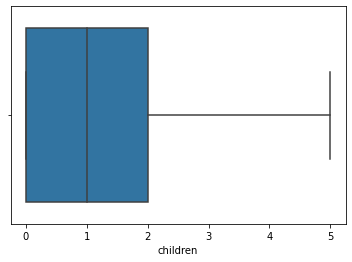

In [27]:
sns.boxplot(df['children'])

In [28]:
# q3 = df['children'].quantile(0.75)
# q3

In [29]:
# q1 = df['children'].quantile(0.25)
# q1

In [30]:
# iqr = q3-q1
# iqr

In [31]:
# lw = q1 - (1.5*iqr)
# lw

In [32]:
# uw = q3 + (1.5*iqr)
# uw

<AxesSubplot:xlabel='charges'>

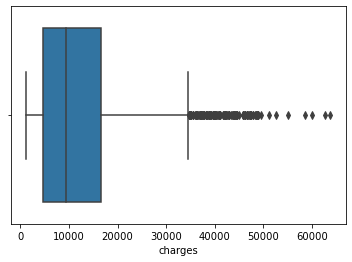

In [33]:
sns.boxplot(df['charges'])

In [34]:
# q3 = df['charges'].quantile(0.75)
# q3

In [35]:
# q1 = df['charges'].quantile(0.25)
# q1

In [36]:
# iqr = q3-q1
# iqr

In [44]:
df.loc[df['bmi']<(q1-(1.5*iqr))] | df.loc[df['bmi']>(q3+(1.5*iqr))]

        age    sex    bmi  children  smoker  region  charges
116   False  False  False     False   False   False    False
286   False  False  False     False   False   False    False
401   False  False  False     False   False   False    False
543   False  False  False     False   False   False    False
847   False  False  False     False   False   False    False
860   False  False  False     False   False   False    False
1047  False  False  False     False   False   False    False
1088  False  False  False     False   False   False    False
1317  False  False  False     False   False   False    False


In [40]:
#checking the outlier value
df.iloc[116]

age                 58
sex               male
bmi              49.06
children             0
smoker              no
region       southeast
charges     11381.3254
Name: 116, dtype: object

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


<AxesSubplot:xlabel='age'>

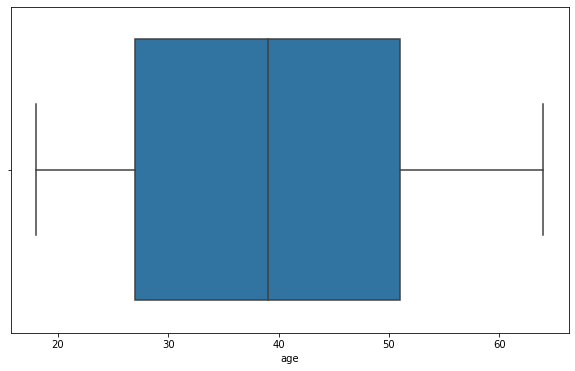

In [65]:
col = 'age'
Q1 = df[col].quantile(.25)
Q2 = df[col].quantile(.50)
Q3 = df[col].quantile(.75)

IQR = Q3 - Q1

#print(df.loc[df[col]<Q1-(1.5*IQR)] | df.loc[df[col]>Q3+(1.5*IQR)])

print((df.loc[(df[col]<(Q1 - 1.5*IQR)) | (df[col]>(Q3 + 1.5*IQR))]))

plt.figure(figsize=(10,6))
sns.boxplot(df[col])

In [46]:
print(Q1,Q2,Q3)

4740.28715 9382.033 16639.912515


      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


<AxesSubplot:xlabel='bmi'>

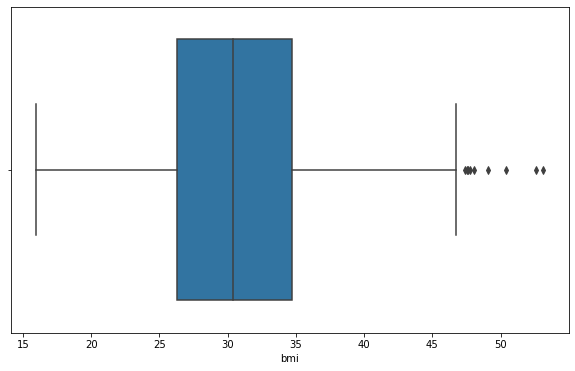

In [63]:
col = 'bmi'
Q1 = df[col].quantile(.25)
Q2 = df[col].quantile(.50)
Q3 = df[col].quantile(.75)

IQR = Q3 - Q1

#print(df.loc[df[col]<Q1-(1.5*IQR)] | df.loc[df[col]>Q3+(1.5*IQR)])

print((df.loc[(df[col]<(Q1 - 1.5*IQR)) | (df[col]>(Q3 + 1.5*IQR))]))


plt.figure(figsize=(10,6))
sns.boxplot(df[col])